In [118]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [195]:
# Load the dataset
df = pd.read_csv('NSI_0424.csv')
df.head()

,ID,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,DISABILITYPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,LIFEEXPPCT,...,Prop_Black,Prop_American_Native,Prop_Asian,Prop_Hawaiian,Prop_Onemorerace,Num_UrgentCare,High_Volume_Utilizer_Calls,Unique_HVU_Callers,Calls_Per_HVU_Caller,High_Volume_Utilizer_Percent
0,51153900100,0.501237,0.076685,0.006587,0.095916,0.033355,0.044565,0.057205,0.299320,0.182564,...,0.164781,0.000917,0.101192,0.000611,0.058698,0.0,7,4,1.8,0.4
1,51153900201,0.771815,0.327176,0.067423,0.154357,0.096774,0.133784,0.032364,0.072102,0.217436,...,0.225092,0.001476,0.092251,0.001476,0.041697,0.0,5,5,1.0,0.4
2,51153900202,0.731086,0.276916,0.048494,0.039679,0.135111,0.171480,0.040980,0.066440,0.169231,...,0.088442,0.001454,0.076327,0.001212,0.036104,0.0,70,9,7.8,4.5
3,51153900203,0.889301,0.301155,0.042468,0.100787,0.143670,0.191298,0.095228,0.057529,0.206154,...,0.283754,0.000185,0.073442,0.001113,0.048034,0.0,31,8,3.9,1.7
4,51153900301,0.556382,0.232398,0.092181,0.134315,0.093147,0.109264,0.048369,0.089010,0.180513,...,0.172069,0.004241,0.099364,0.003332,0.057255,2.0,2,2,1.0,0.1


In [215]:
df['PTRAF'].mean()

795792.9110880435

In [239]:
df.describe().iloc[:,110:]

,High_Volume_Utilizer_Calls,Unique_HVU_Callers,Calls_Per_HVU_Caller,High_Volume_Utilizer_Percent
count,92.000000,92.000000,92.000000,92.000000
mean,33.923913,8.184783,4.059783,1.613043
std,40.518679,9.832587,3.452792,1.507871
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,2.000000,0.500000
50%,23.000000,6.500000,3.400000,1.400000
75%,46.000000,11.000000,4.525000,2.125000
max,290.000000,86.000000,21.000000,8.100000


In [75]:
# Transform some variables
df['Prop_Race_Color'] = 1-df['Prop_White']

In [182]:
# Define domain groupings based on refined categories
demographics_vars = [
    "DISABILITYPCT", "UNDER5PCT", "OVER64PCT", "E_SNGPNT_P", "E_GROUPQ_P", 'Total_Population',
    "Median_Age", "Age_Dependency_Ratio", "Old-age_Dependency_Ratio", "Child_Dependency_Ratio","Prop_Race_Color", "Sex_Ratio(males per 100 females)"
]
socioeconomic_vars = [
    "LOWINCPCT", "UNEMPPCT", "LINGISOPCT", "LESSHSPCT", "E_POV150_P", 
    "With_PublicAssIncome_P", "With_SSI_P", "E_UNINSUR_P", "With_Medicaid_P"
]
housing_vars = [
    "PRE1960PCT", "E_HBURD_P", "House_Vacant_P", "E_MUNIT_P", 
    "E_MOBILE_P", "E_CROWD_P", "Owner_occupied_P", "Mean_Proportion_HHIncome"
]
transportation_vars = [
    "PTRAF", "E_NOVEH_P", "Mean_Transportation_time(min)", 
    "Work_Drivealone_P", "Work_Carpooled_P", "Work_PublicTransportation_P", 
    "Work_Walk_P", "Work_Taximotorbike_P", "Work_Fromhome_P"
]
transportation_safety_vars = [
    "Percent_Fatal_Injury", "Percent_Severe_Injury", "Percent_Visible_Injury", "Percent_Nonvisible_Injury",
    "Avg_Kill_Person", "Avg_Kill_Pedestrian", "Avg_Injured_Person", "Avg_Injured_Pedestrian",
    "Percent_Alcohol_Related", "Percent_Distracted_Related", "Percent_Drowsy_Related", 
    "Percent_Drug_Related", "Percent_Speed_Related", "Percent_Hitrun_Related", 
    "Percent_Pedestrian_Related", "Percent_Schoolzone_Related", "Percent_Lgtruck_Related",
    "Percent_Young_Related", "Percent_Senior_Related", "Percent_Bike_Related", 'Percent_Night_Related','Percent_Workzone_Related'
]
environmental_vars = [
    "PM25", "OZONE", "DSLPM", "NO2", "RSEI_AIR", 
    "PTSDF", "UST", "PWDIS", "PNPL", "PRMP"
]
public_health_vars = [
    "LIFEEXPPCT", "EMS_Calls", "Fire_Calls", "Structure_Fires", 
    "Stroke_Calls", "Cardiac_Calls", "Diabetic_Calls", 
    "CPR_Calls", "Shootings", "Stabbings", "Opioid_Calls", "Auto_Accidents",
    'High_Volume_Utilizer_Calls','Unique_HVU_Callers','Calls_Per_HVU_Caller','High_Volume_Utilizer_Percent'
]
protective_infra_vars = [
    "Num_School", "Num_Fire_Station", "Num_Library", 
    "Num_Hospital", "Num_UrgentCare", "Num_Worship", "Num_Shopping_Center"
]

In [183]:
unused_columns = list(
    set(df.columns.to_list()) -
    set(
        demographics_vars +
        socioeconomic_vars +
        housing_vars +
        transportation_vars +
        transportation_safety_vars +
        environmental_vars +
        public_health_vars +
        protective_infra_vars
    )
)

unused_columns

['Prop_Asian',
 'DWATER',
 'ID',
 'PEOPCOLORPCT',
 'E_TOTPOP',
 'Percent_Animal_Related',
 'Environmental_Score',
 'Percent_Motorcycle_Related',
 'Prop_Black',
 'Percent_Guardrail_Related',
 'E_HH',
 'Socioeconomic_Score',
 'E_HU',
 'Protective_Infrastructure_Score',
 'Prop_American_Native',
 'Total_Calls',
 'Transportation_Safety_Score',
 'Prop_Hisp',
 'Public_Health_Score',
 'Prop_White',
 'Housing_Score',
 'Percent_Unrestrained_Related',
 'Demographics_Score',
 'Total_Crash',
 'Percent_Urban_Crash',
 'Prop_Hawaiian',
 'Prop_Onemorerace',
 'Percent_Mainline_Related',
 'Transportation_Score',
 'SVI_statewide']

### Impute Missing Values
Flag **51153980100** in our analysis, we impute a lot of 0 for this tract since it is kind of unique.

In [78]:
df_missing = df.isna().sum().reset_index().rename(columns={0: 'Missing Values'}).sort_values(by='Missing Values', ascending=False)
df_missing[df_missing['Missing Values'] > 0]

,index,Missing Values
9,LIFEEXPPCT,16
20,DWATER,3
94,Old-age_Dependency_Ratio,2
87,Percent_Mainline_Related,1
80,Percent_Hitrun_Related,1
...,...,...
74,Percent_Unrestrained_Related,1
29,E_SNGPNT_P,1
28,E_HBURD_P,1
27,E_UNINSUR_P,1


In [79]:
# Columns to fill with mean
mean_fill_cols = ["LIFEEXPPCT", "DWATER", "Old-age_Dependency_Ratio"]

# Fill those with their own column mean
for col in mean_fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Fill all other remaining NaNs with 0
df = df.fillna(0)

#### Demographics Variables

In [47]:
# Correlation filter function
def filter_highly_correlated(variables, threshold=0.8):
    corr_matrix = df[variables].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    filtered_vars = [v for v in variables if v not in to_drop]
    print(f"Dropped due to correlation > {threshold}: {to_drop}")
    return filtered_vars


In [48]:
# Run the function
demographic_filtered = filter_highly_correlated(demographics_vars)

Dropped due to correlation > 0.8: ['Median_Age', 'Age_Dependency_Ratio', 'Old-age_Dependency_Ratio']


In [60]:
# PCA and weighted score function
def pca_weighted_score(variables, domain_name, variance_threshold=0.85):
    data_subset = df[variables].copy()
    data_subset = data_subset.fillna(data_subset.mean())  # Fill NaNs with mean

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data_subset)

    # PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Choose components explaining threshold
    explained = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained >= variance_threshold) + 1
    selected_components = X_pca[:, :n_components]

    # Weighted score using explained variance
    weights = pca.explained_variance_ratio_[:n_components] / np.sum(pca.explained_variance_ratio_[:n_components])
    final_score = selected_components @ weights
    df[f"{domain_name}_Score"] = final_score

    # Create PC loadings DataFrame
    loadings_df = pd.DataFrame(
        pca.components_[:n_components].T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=variables
    )

    print(f"{domain_name} - Retained {n_components} components")
    return df, pca, selected_components, weights, loadings_df


In [80]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(demographics_vars, "Demographics")

Demographics - Retained 6 components


In [72]:
demo_weights

array([0.41437823, 0.186423  , 0.143637  , 0.11750373, 0.08202814,
       0.0560299 ])

In [66]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
DISABILITYPCT,0.338095,0.177359,0.064690,0.382029,0.184904,-0.151981
UNDER5PCT,-0.222506,0.327132,0.299794,0.134700,-0.414174,-0.385011
OVER64PCT,0.463761,0.017569,0.047055,0.064307,0.010300,-0.093406
E_SNGPNT_P,-0.127108,0.346348,-0.160623,0.532586,0.070830,0.637807
E_GROUPQ_P,-0.061666,-0.308575,0.580053,0.223782,-0.134918,0.329386
Total_Population,-0.041951,0.375080,0.141125,-0.459465,0.563516,0.240359
Median_Age,0.408119,0.110247,0.091748,-0.080220,0.203583,-0.170855
Age_Dependency_Ratio,0.421607,0.244845,0.084229,-0.050072,-0.256836,0.149283
Old-age_Dependency_Ratio,0.449209,0.019454,0.039711,0.111849,-0.133547,0.106379
Child_Dependency_Ratio,-0.035262,0.495018,0.106089,-0.379660,-0.458667,0.186176


Higher Demographic Score = higher demographic vulnerability (aging, dependent, complex households)

#### Socioeconomic Variables

In [81]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(socioeconomic_vars, "Socioeconomic")

Socioeconomic - Retained 4 components


In [83]:
demo_weights

array([0.6814831 , 0.13749186, 0.09707438, 0.08395067])

In [84]:
demo_loadings

,PC1,PC2,PC3,PC4
LOWINCPCT,0.397382,0.104764,-0.049047,-0.208662
UNEMPPCT,0.153378,0.761187,0.307413,0.535363
LINGISOPCT,0.351895,-0.064110,-0.345508,0.198773
LESSHSPCT,0.363016,-0.209485,-0.274726,0.235188
E_POV150_P,0.381646,0.097125,0.102918,-0.263137
With_PublicAssIncome_P,0.319119,0.146178,0.271166,-0.367470
With_SSI_P,0.196695,-0.555154,0.728179,0.312111
E_UNINSUR_P,0.370553,-0.142148,-0.293171,0.373498
With_Medicaid_P,0.373446,0.049217,0.089025,-0.365832


High Socioeconomic Score = More socioeconomic disadvantage

#### Housing Variables

In [85]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(housing_vars, "Housing")

Housing - Retained 5 components


In [87]:
demo_weights

array([0.45478511, 0.17470619, 0.16392391, 0.13050998, 0.07607482])

In [ ]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5
PRE1960PCT,0.167987,0.610342,-0.494498,0.030543,0.432831
E_HBURD_P,0.480741,0.015931,0.209876,-0.144846,0.034644
House_Vacant_P,0.366823,0.346388,-0.348314,-0.112776,-0.397798
E_MUNIT_P,0.461590,-0.282585,-0.068217,-0.141675,-0.148753
E_MOBILE_P,0.165634,0.339088,0.364226,0.769238,-0.322695
E_CROWD_P,0.391304,-0.170641,0.218180,0.243672,0.696035
Owner_occupied_P,-0.444688,0.330303,0.176593,-0.032045,0.205114
Mean_Proportion_HHIncome,0.121424,0.417362,0.611555,-0.541448,-0.020426


Higher Housing Score = more unstable, crowded, and financially burdensome housing conditions

#### Transportation Variables

In [89]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(transportation_vars, "Transportation")

Transportation - Retained 6 components


In [90]:
demo_weights

array([0.30531992, 0.21260426, 0.16015823, 0.11886611, 0.10804611,
       0.09500536])

In [91]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
PTRAF,-0.369579,0.368227,-0.119850,-0.230804,0.381686,-0.194922
E_NOVEH_P,-0.383399,-0.023248,-0.023658,-0.266788,-0.528115,0.655008
Mean_Transportation_time(min),0.316190,0.514279,0.324401,-0.265987,0.121720,0.077220
Work_Drivealone_P,-0.136248,0.431280,0.506786,-0.017132,-0.497869,-0.327297
Work_Carpooled_P,-0.369619,-0.087291,0.419398,-0.179082,0.538048,0.320023
Work_PublicTransportation_P,0.143754,0.489761,-0.481360,-0.197038,0.064139,0.284285
Work_Walk_P,-0.345068,-0.097413,-0.359750,-0.495469,-0.130838,-0.469823
Work_Taximotorbike_P,-0.220971,0.392270,-0.278265,0.607181,-0.000354,0.091189
Work_Fromhome_P,0.522200,-0.050318,-0.092493,-0.345627,-0.044637,0.087187


Higher Transportation Score = better commuting access and flexibility

#### Transportation Safety Variables

In [92]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(transportation_safety_vars, "Transportation_Safety")

Transportation_Safety - Retained 12 components


In [93]:
demo_weights

array([0.179147  , 0.14004567, 0.12187779, 0.11865154, 0.0782156 ,
       0.06653602, 0.06376974, 0.05593856, 0.05204435, 0.04509111,
       0.04220691, 0.03647571])

In [94]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Percent_Fatal_Injury,-0.182865,0.429602,0.229768,-0.199210,0.246480,-0.035606,-0.082471,-0.102719,0.015060,0.023411,0.079025,-0.163690
Percent_Severe_Injury,0.062422,-0.058186,-0.107638,-0.247361,0.122609,0.590268,0.389832,-0.007991,0.184785,0.006051,-0.129227,-0.034661
Percent_Visible_Injury,0.139467,-0.025962,0.344390,0.416696,0.083584,-0.151572,0.088662,0.147612,-0.162406,-0.186771,-0.089919,0.093514
Percent_Nonvisible_Injury,-0.126642,-0.196027,-0.136337,-0.002663,0.039779,-0.436930,0.294523,0.136825,-0.093792,0.402209,0.455122,-0.198570
Avg_Kill_Person,-0.185453,0.424984,0.233924,-0.202910,0.245540,-0.036655,-0.082019,-0.097945,0.007495,0.024859,0.083581,-0.162139
Avg_Kill_Pedestrian,0.038927,0.409800,0.062552,-0.076051,-0.061352,-0.035340,0.048800,0.284588,-0.248983,0.077980,0.013750,0.402002
Avg_Injured_Person,0.078831,-0.130937,0.180684,0.381992,0.343692,0.073593,0.230525,0.041417,-0.238227,-0.199072,-0.111156,-0.099516
Avg_Injured_Pedestrian,0.448115,0.188001,0.026957,0.004101,-0.238746,0.015274,0.007053,0.117204,0.049926,0.094978,-0.087952,-0.104895
Percent_Alcohol_Related,0.281288,0.036880,0.154910,-0.105646,0.363290,-0.169845,0.002027,-0.106305,0.470072,-0.141773,0.137087,0.065048
Percent_Distracted_Related,-0.054207,-0.044404,0.371752,0.257413,-0.205085,-0.001552,0.103866,-0.310679,0.312895,-0.078369,0.024461,-0.249424


Higher Transportation Safety Score = more dangerous traffic injury environment

#### Environmental Variables

In [96]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(environmental_vars, "Environmental")

Environmental - Retained 5 components


In [97]:
demo_weights

array([0.37642757, 0.27105292, 0.15815463, 0.12373387, 0.07063101])

In [98]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5
PM25,0.384456,-0.064962,0.186424,-0.493912,-0.262645
OZONE,0.361709,0.324675,-0.290177,-0.199795,-0.304309
DSLPM,0.443979,0.284037,0.023966,0.175427,-0.136563
NO2,0.344079,0.161120,-0.193830,0.588389,-0.043913
RSEI_AIR,-0.223130,0.513119,-0.109730,-0.116011,-0.174790
PTSDF,-0.199270,0.574286,0.117934,-0.043674,-0.066983
UST,0.342663,0.235101,0.121786,0.041051,0.792383
PWDIS,-0.182947,0.091813,0.568368,0.487962,-0.286265
PNPL,-0.365758,0.343533,-0.076977,-0.174105,0.266398
PRMP,0.178018,0.094426,0.687860,-0.231703,0.044849


Higher Environmental Score = more exposure to pollution and industrial hazards

#### Public Health Variables

In [99]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(public_health_vars, "Public_Health")

Public_Health - Retained 5 components


In [103]:
demo_weights

array([0.63624247, 0.14879096, 0.07777339, 0.07195966, 0.06523352])

In [ ]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5
LIFEEXPPCT,-0.022351,0.593267,0.580093,-0.144202,-0.493618
EMS_Calls,0.372306,-0.095358,0.050995,-0.089199,-0.077651
Fire_Calls,0.332299,-0.022761,-0.333231,-0.057281,-0.334266
Structure_Fires,0.310777,0.102927,-0.268968,0.262147,-0.133777
Stroke_Calls,0.269078,-0.370647,0.474485,-0.101018,-0.048245
Cardiac_Calls,0.355758,-0.117161,0.165757,-0.167951,0.079944
Diabetic_Calls,0.309574,-0.040198,0.017949,-0.013303,0.125278
CPR_Calls,0.281125,-0.245627,0.356810,0.347463,0.183651
Shootings,0.206224,0.412763,-0.010211,0.701644,0.088831
Stabbings,0.204339,0.426547,-0.099228,-0.446208,0.542862


Higher Public Health Score = more public health demand and EMS burden

#### Protective Infrastructure Variables

In [105]:
# Run the function
df, demo_pca, demo_components, demo_weights, demo_loadings = pca_weighted_score(protective_infra_vars, "Protective_Infrastructure")

Protective_Infrastructure - Retained 5 components


In [106]:
demo_weights

array([0.36458597, 0.22084511, 0.1599332 , 0.14375724, 0.11087848])

In [107]:
demo_loadings

,PC1,PC2,PC3,PC4,PC5
Num_School,0.084380,0.521666,-0.564846,-0.149624,0.606193
Num_Fire_Station,0.125134,0.367447,0.656405,0.505749,0.383352
Num_Library,0.209435,0.508766,-0.283982,0.449987,-0.603548
Num_Hospital,0.481506,-0.361081,-0.137647,0.262492,0.296064
Num_UrgentCare,0.499082,-0.317030,-0.231081,0.263041,-0.040318
Num_Worship,0.423781,0.321117,0.234187,-0.494946,-0.174234
Num_Shopping_Center,0.522338,-0.001050,0.205541,-0.369160,-0.040805


Higher Protective Infrastructure Score = more access to emergency, civic, health, and supportive infrastructure

### Final Clustering

**higher scores = more vulnerability**

✅ **Scores to Keep As-Is (already align with vulnerability)**

| Domain | Direction | Interpretation |
|--------|-----------|----------------|
| **Demographics** | ✅ Keep | Higher = more dependency, single-parent households, group quarters, etc. |
| **Socioeconomic** | ✅ Keep | Higher = more poverty, unemployment, uninsured, public assistance |
| **Housing Stability & Burden** | ✅ Keep | Higher = more crowding, cost burden, vacancy |
| **Transportation Safety / Crash Risk** | ✅ Keep | Higher = more pedestrian injuries, alcohol/night crashes, etc. |
| **Environmental Exposure** | ✅ Keep | Higher = more pollution, Superfund sites, USTs, etc. |
| **Public Health / EMS** | ✅ Keep | Higher = more EMS calls, opioid, cardiac, fire-related, etc. |

 🔁 **Scores to Reverse (currently reflect assets/protection)**

| Domain | Direction | Why Reverse? |
|--------|-----------|--------------|
| **Transportation Access** | 🔁 Reverse | Higher = better access (e.g. more driving alone, less vehicle unavailability, more telework) — flip to reflect vulnerability due to limited access |
| **Protective Infrastructure** | 🔁 Reverse | Higher = more schools, hospitals, urgent care, etc. — flip so that *less protection = more vulnerability* |

In [117]:
df_final = df[['ID', 'Demographics_Score', 'Socioeconomic_Score', 'Housing_Score', 'Transportation_Score',
                'Transportation_Safety_Score', 'Environmental_Score', 'Public_Health_Score', 
                'Protective_Infrastructure_Score']].copy()
# Reverse scores where higher originally = more protection/access
df_final["Transportation_Score"] *= -1
df_final["Protective_Infrastructure_Score"] *= -1
df_final.head()

,ID,Demographics_Score,Socioeconomic_Score,Housing_Score,Transportation_Score,Transportation_Safety_Score,Environmental_Score,Public_Health_Score,Protective_Infrastructure_Score
0,51153900100,0.976179,-1.390303,-0.639578,-0.724290,-0.106969,0.321319,-0.651751,0.667209
1,51153900201,0.150450,1.659004,1.208592,0.241714,-0.150651,2.118005,-0.964350,0.013746
2,51153900202,-0.576117,0.978471,0.598885,0.176477,-0.333398,1.389862,-0.066540,-0.385942
3,51153900203,-0.246335,2.200079,1.701457,1.027589,0.681470,0.778261,1.829519,0.479859
4,51153900301,0.039374,1.266971,0.401549,1.531577,-0.320269,2.099782,-0.459366,-0.450081


In [122]:
cluster_vars = ['Demographics_Score', 'Socioeconomic_Score', 'Housing_Score', 'Transportation_Score',
                'Transportation_Safety_Score', 'Environmental_Score', 'Public_Health_Score', 
                'Protective_Infrastructure_Score']

In [126]:
X = df_final.drop(columns=['ID'])

In [127]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(X)

In [128]:
score = silhouette_score(X, df_final['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.339


In [129]:
cluster_means = df.groupby('Cluster')[cluster_vars].mean()

# Rank clusters by their overall vulnerability
cluster_means['Overall_Vulnerability'] = cluster_means.mean(axis=1)
cluster_order = cluster_means['Overall_Vulnerability'].sort_values(ascending=False).index

# Map cluster index to risk label
cluster_labels = {
    cluster_order[0]: "High-Risk Areas",
    cluster_order[1]: "Moderate-Risk Areas",
    cluster_order[2]: "Low-Risk Areas"
}

df_final["Cluster_Description"] = df_final["Cluster"].map(cluster_labels)

In [130]:
df_final

,ID,Demographics_Score,Socioeconomic_Score,Housing_Score,Transportation_Score,Transportation_Safety_Score,Environmental_Score,Public_Health_Score,Protective_Infrastructure_Score,Cluster,Cluster_Description
0,51153900100,0.976179,-1.390303,-0.639578,-0.724290,-0.106969,0.321319,-0.651751,0.667209,1,Moderate-Risk Areas
1,51153900201,0.150450,1.659004,1.208592,0.241714,-0.150651,2.118005,-0.964350,0.013746,2,High-Risk Areas
2,51153900202,-0.576117,0.978471,0.598885,0.176477,-0.333398,1.389862,-0.066540,-0.385942,2,High-Risk Areas
3,51153900203,-0.246335,2.200079,1.701457,1.027589,0.681470,0.778261,1.829519,0.479859,2,High-Risk Areas
4,51153900301,0.039374,1.266971,0.401549,1.531577,-0.320269,2.099782,-0.459366,-0.450081,2,High-Risk Areas
...,...,...,...,...,...,...,...,...,...,...,...
88,51153901702,0.002663,3.256857,2.122206,1.264939,-0.016143,-0.108361,-0.690077,0.395198,2,High-Risk Areas
89,51153901703,-0.499223,0.240101,0.108608,0.334745,0.129787,0.287800,-1.344528,0.355411,1,Moderate-Risk Areas
90,51153901704,0.290501,3.356762,1.146442,1.646556,0.242810,1.707480,1.965990,0.126669,2,High-Risk Areas
91,51153901900,-0.076864,1.523729,0.632383,0.115958,-0.164304,0.803030,1.112671,-1.112090,2,High-Risk Areas


In [131]:
df_final.Cluster.value_counts()

Cluster
1    57
2    33
0     3
Name: count, dtype: int64

In [136]:
df_try = df_final.copy()

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(df_try[cluster_vars])
df_try["Raw_Safety_Index"] = -X.mean(axis=1)  # Negative so higher = safer

# Rank-based (so 20 = safest, 1 = least safe)
df_try["Safety_Index_1_to_20"] = pd.qcut(df_try["Raw_Safety_Index"], q=20, labels=False) + 1
df_try["Safety_Index_1_to_20"] = df_try["Safety_Index_1_to_20"].astype(int)
#df_try = df_try.sort_values("Safety_Index_1_to_20", ascending=False)

df_try["Safety_Tier"] = pd.cut(
    df_try["Safety_Index_1_to_20"],
    bins=[0, 5, 10, 15, 20],
    labels=["High Risk", "Moderate Risk", "Low Risk", "Very Low Risk"]
)

df_try

,ID,Demographics_Score,Socioeconomic_Score,Housing_Score,Transportation_Score,Transportation_Safety_Score,Environmental_Score,Public_Health_Score,Protective_Infrastructure_Score,Cluster,Cluster_Description,Raw_Safety_Index,Safety_Index_1_to_20,Safety_Tier
0,51153900100,0.976179,-1.390303,-0.639578,-0.724290,-0.106969,0.321319,-0.651751,0.667209,1,Moderate-Risk Areas,0.121894,11,Low Risk
1,51153900201,0.150450,1.659004,1.208592,0.241714,-0.150651,2.118005,-0.964350,0.013746,2,High-Risk Areas,-0.588603,3,High Risk
2,51153900202,-0.576117,0.978471,0.598885,0.176477,-0.333398,1.389862,-0.066540,-0.385942,2,High-Risk Areas,-0.173248,7,Moderate Risk
3,51153900203,-0.246335,2.200079,1.701457,1.027589,0.681470,0.778261,1.829519,0.479859,2,High-Risk Areas,-1.115433,1,High Risk
4,51153900301,0.039374,1.266971,0.401549,1.531577,-0.320269,2.099782,-0.459366,-0.450081,2,High-Risk Areas,-0.601226,3,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,51153901702,0.002663,3.256857,2.122206,1.264939,-0.016143,-0.108361,-0.690077,0.395198,2,High-Risk Areas,-0.830074,2,High Risk
89,51153901703,-0.499223,0.240101,0.108608,0.334745,0.129787,0.287800,-1.344528,0.355411,1,Moderate-Risk Areas,-0.078053,8,Moderate Risk
90,51153901704,0.290501,3.356762,1.146442,1.646556,0.242810,1.707480,1.965990,0.126669,2,High-Risk Areas,-1.305054,1,High Risk
91,51153901900,-0.076864,1.523729,0.632383,0.115958,-0.164304,0.803030,1.112671,-1.112090,2,High-Risk Areas,-0.179316,7,Moderate Risk


In [ ]:
import geopandas as gpd

# Load the shapefile (replace with your actual path)
gdf_shp = gpd.read_file("Demographic_files/tl_2024_51_tract.shp")

# Check CRS and preview
print(gdf_shp.crs)
print(gdf_shp.columns)

EPSG:4269
Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry'],
      dtype='object')


In [173]:
# Ensure tract ID is string type for matching
#df_try["ID"] = df_try["ID"].astype(str)
gdf_shp["GEOID"] = gdf_shp["GEOID"].astype(str)

# Merge shapefile with your safety index data
df_try = df_try.rename(columns={"TRACTCE": "GEOID"})
merged_data = df_try[["GEOID", "Safety_Index_1_to_20"]].merge(gdf_shp, on="GEOID", how="left")

# Check for missing merges
missing = merged_data["Safety_Index_1_to_20"].isna().sum()
print(f"Unmatched tracts: {missing}")

Unmatched tracts: 0


In [154]:
def add_geographic_labels(ax, merged_data):
    """
    Step 14.4: Add geographic labels to the visualization
    """
    # Add census tract labels
    for idx, row in merged_data.iterrows():
        centroid = row.geometry.centroid
        ax.text(
            centroid.x,
            centroid.y,
            row['TRACTCE'],
            fontsize=5,
            ha='center',
            va='center',
            alpha=0.4
        )

    # Geographic features with coordinates - Updated Brentsville coordinates
    features = {
        'districts': {
            'Brentsville': (-77.58, 38.68),  # Updated coordinates for Brentsville
            'Coles': (-77.5, 38.67),
            'Gainesville': (-77.65, 38.8),
            'Neabsco': (-77.32, 38.63),
            'Potomac': (-77.28, 38.62),
            'Woodbridge': (-77.25, 38.72),
            'Occoquan': (-77.26, 38.68)
        },
        'cities': {
            'Manassas': (-77.42, 38.75),
            'Haymarket': (-77.63, 38.82),
            'Dale City': (-77.31, 38.65),
            'Dumfries': (-77.33, 38.57),
        },
        'neighborhoods': {
            'Lake Ridge': (-77.29, 38.67),
            'Montclair': (-77.33, 38.61),
            'Yorkshire': (-77.45, 38.77),
            'Bull Run': (-77.51, 38.79),
            'Independent Hill': (-77.45, 38.65)
        }
    }

    # Add labels with different styles
    for feature_type, locations in features.items():
        for name, coords in locations.items():
            style = {
                'districts': {'fontsize': 14, 'fontweight': 'bold', 'bbox': dict(facecolor='white', alpha=0.7, edgecolor='black', pad=2)},
                'cities': {'fontsize': 11, 'bbox': dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1)},
                'neighborhoods': {'fontsize': 9, 'style': 'italic', 'bbox': dict(facecolor='white', alpha=0.5, edgecolor='none', pad=0.5)}
            }[feature_type]

            ax.text(
                coords[0],
                coords[1],
                name,
                ha='center',
                va='center',
                **style
            )

def add_map_elements(ax):
    """
    Step 14.5: Add map elements (North arrow, scale bar)
    """
    # Add North arrow
    ax.text(
        0.95, 0.95, '↑N',
        transform=ax.transAxes,
        fontsize=14,
        ha='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

    # Add scale bar (approximate - without using get_extent)
    # This uses axis-relative coordinates instead
    bar_x = 0.1
    bar_y = 0.1
    bar_width = 0.05

    ax.plot([bar_x, bar_x + bar_width], [bar_y, bar_y], 'k-',
           transform=ax.transAxes, linewidth=2)
    ax.plot([bar_x, bar_x], [bar_y - 0.005, bar_y + 0.005], 'k-',
           transform=ax.transAxes, linewidth=2)
    ax.plot([bar_x + bar_width, bar_x + bar_width], [bar_y - 0.005, bar_y + 0.005], 'k-',
           transform=ax.transAxes, linewidth=2)

    ax.text(bar_x + bar_width/2, bar_y + 0.01, 'Approx. 5km',
           transform=ax.transAxes, ha='center', fontsize=8,
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Add creation date
    ax.text(
        0.02, 0.02,
        f'Created: {pd.Timestamp.now().strftime("%Y-%m-%d")}',
        transform=ax.transAxes,
        fontsize=8,
        alpha=0.7
    )

    # Add data source and model info
    ax.text(
        0.5, 0.02,
        'Source: Prince William County Risk Assessment Model',
        transform=ax.transAxes,
        fontsize=8,
        ha='center',
        alpha=0.7
    )

In [174]:
merged_data = gpd.GeoDataFrame(merged_data, geometry='geometry')

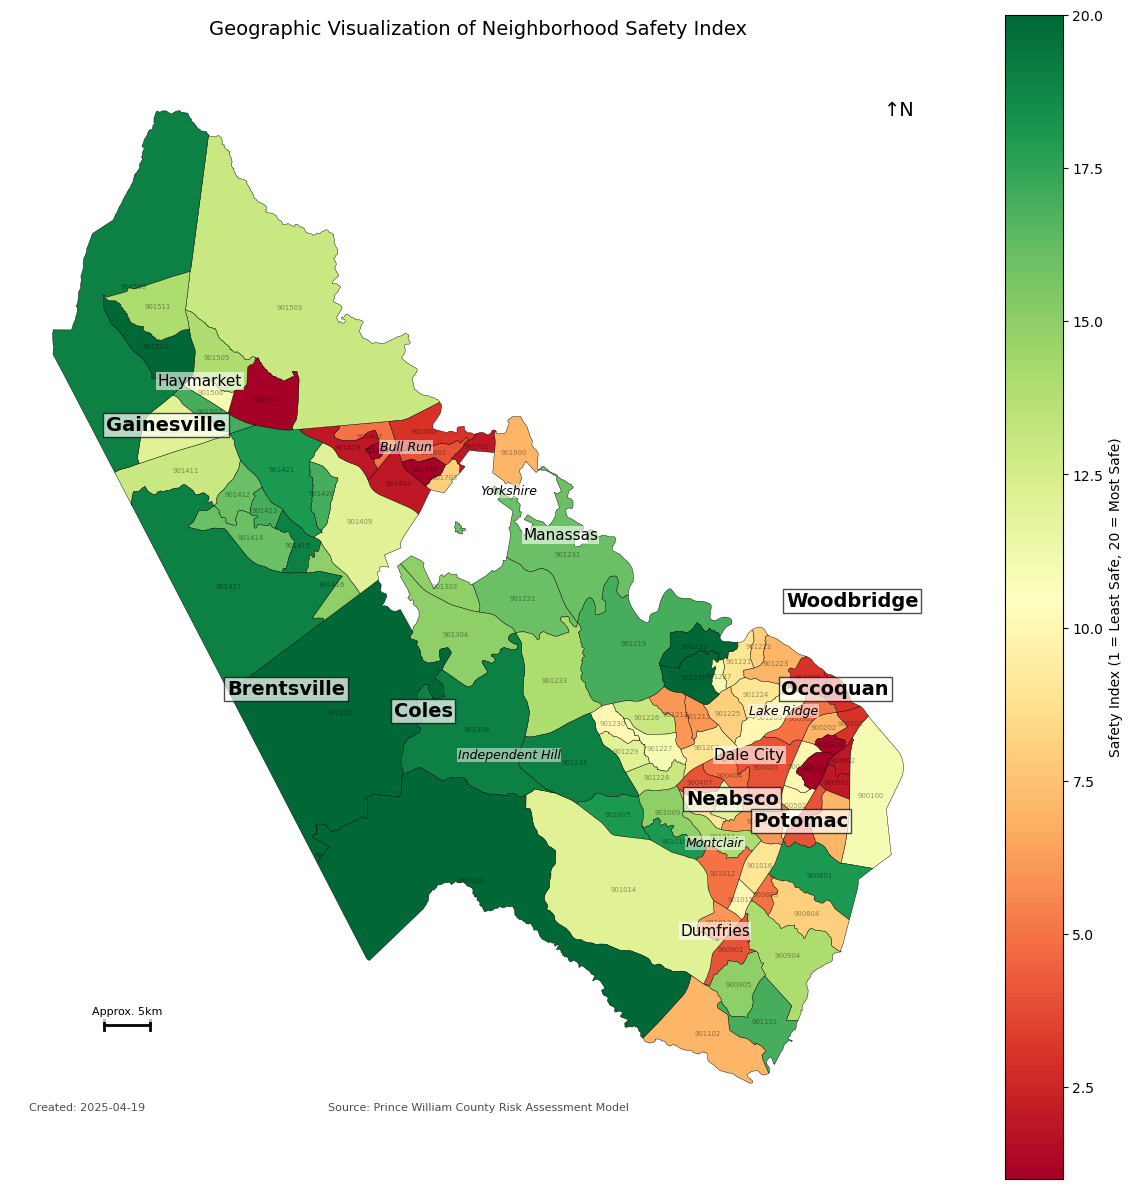

In [158]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

# Plot with merged data
merged_data.plot(
    column="Safety_Index_1_to_20",
    cmap="RdYlGn",
    linewidth=0.3,
    edgecolor="black",  # correct place for edgecolor
    legend=True,
    ax=ax,
    legend_kwds={'label': "Safety Index (1 = Least Safe, 20 = Most Safe)"}
)

# Add district, neighborhood, and tract labels
add_geographic_labels(ax, merged_data)

# Add map elements (north arrow, scale bar, source text)
add_map_elements(ax)

# Final touches
ax.set_title("Geographic Visualization of Neighborhood Safety Index", fontsize=14, pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()



In [175]:
merged_data[merged_data.Safety_Index_1_to_20==1]

,GEOID,Safety_Index_1_to_20,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
3,51153900203,1,51,153,900203,1400000US51153900203,9002.03,Census Tract 9002.03,G5020,S,1072988,0,+38.6546809,-077.2626427,"POLYGON ((-77.27194 38.65474, -77.27185 38.654..."
14,51153900504,1,51,153,900504,1400000US51153900504,9005.04,Census Tract 9005.04,G5020,S,1967148,0,+38.6434388,-077.2720178,"POLYGON ((-77.28254 38.64241, -77.28247 38.642..."
74,51153901419,1,51,153,901419,1400000US51153901419,9014.19,Census Tract 9014.19,G5020,S,556936,3011,+38.7881629,-077.5270594,"POLYGON ((-77.53291 38.7887, -77.53288 38.7887..."
78,51153901504,1,51,153,901504,1400000US51153901504,9015.04,Census Tract 9015.04,G5020,S,8392292,33777,+38.8102603,-077.5879954,"POLYGON ((-77.61341 38.80603, -77.61331 38.806..."
90,51153901704,1,51,153,901704,1400000US51153901704,9017.04,Census Tract 9017.04,G5020,S,1787868,266,+38.7791653,-077.4991628,"POLYGON ((-77.51206 38.78322, -77.5115 38.7833..."


In [162]:
df_try.head()

,GEOID,Demographics_Score,Socioeconomic_Score,Housing_Score,Transportation_Score,Transportation_Safety_Score,Environmental_Score,Public_Health_Score,Protective_Infrastructure_Score,Cluster,Cluster_Description,Raw_Safety_Index,Safety_Index_1_to_20,Safety_Tier
0,51153900100,0.976179,-1.390303,-0.639578,-0.724290,-0.106969,0.321319,-0.651751,0.667209,1,Moderate-Risk Areas,0.121894,11,Low Risk
1,51153900201,0.150450,1.659004,1.208592,0.241714,-0.150651,2.118005,-0.964350,0.013746,2,High-Risk Areas,-0.588603,3,High Risk
2,51153900202,-0.576117,0.978471,0.598885,0.176477,-0.333398,1.389862,-0.066540,-0.385942,2,High-Risk Areas,-0.173248,7,Moderate Risk
3,51153900203,-0.246335,2.200079,1.701457,1.027589,0.681470,0.778261,1.829519,0.479859,2,High-Risk Areas,-1.115433,1,High Risk
4,51153900301,0.039374,1.266971,0.401549,1.531577,-0.320269,2.099782,-0.459366,-0.450081,2,High-Risk Areas,-0.601226,3,High Risk


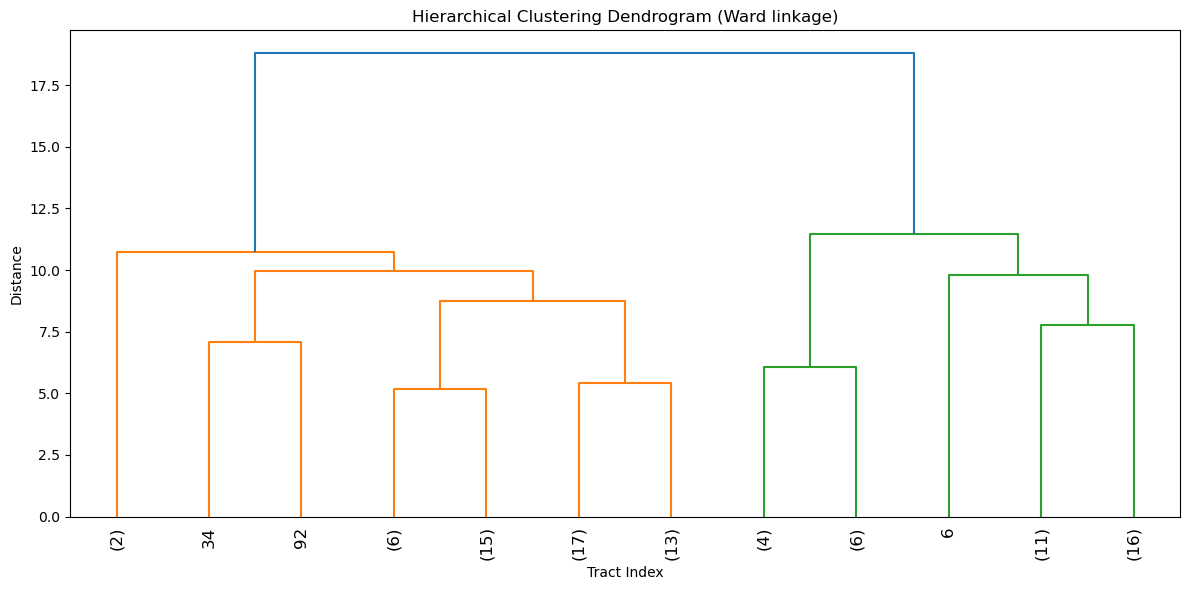

In [164]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Linkage matrix (Ward minimizes within-cluster variance)
Z = linkage(X, method='ward')

# Dendrogram plot
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df_try.index, truncate_mode='lastp', p=12, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Tract Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [169]:
from scipy.cluster.hierarchy import fcluster

# Set the number of clusters (try 3–5 based on dendrogram)
n_clusters = 4
df_try["Cluster_Hier"] = fcluster(Z, t=n_clusters, criterion="maxclust")

# View results
print(df_try["Cluster_Hier"].value_counts().sort_index())


Cluster_Hier
1     2
2    53
3    10
4    28
Name: count, dtype: int64
